<a href="https://colab.research.google.com/github/brandoncohen23/Probability_Statistics-1/blob/main/Cohen_Stats_Lab_9_Linear_Model_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

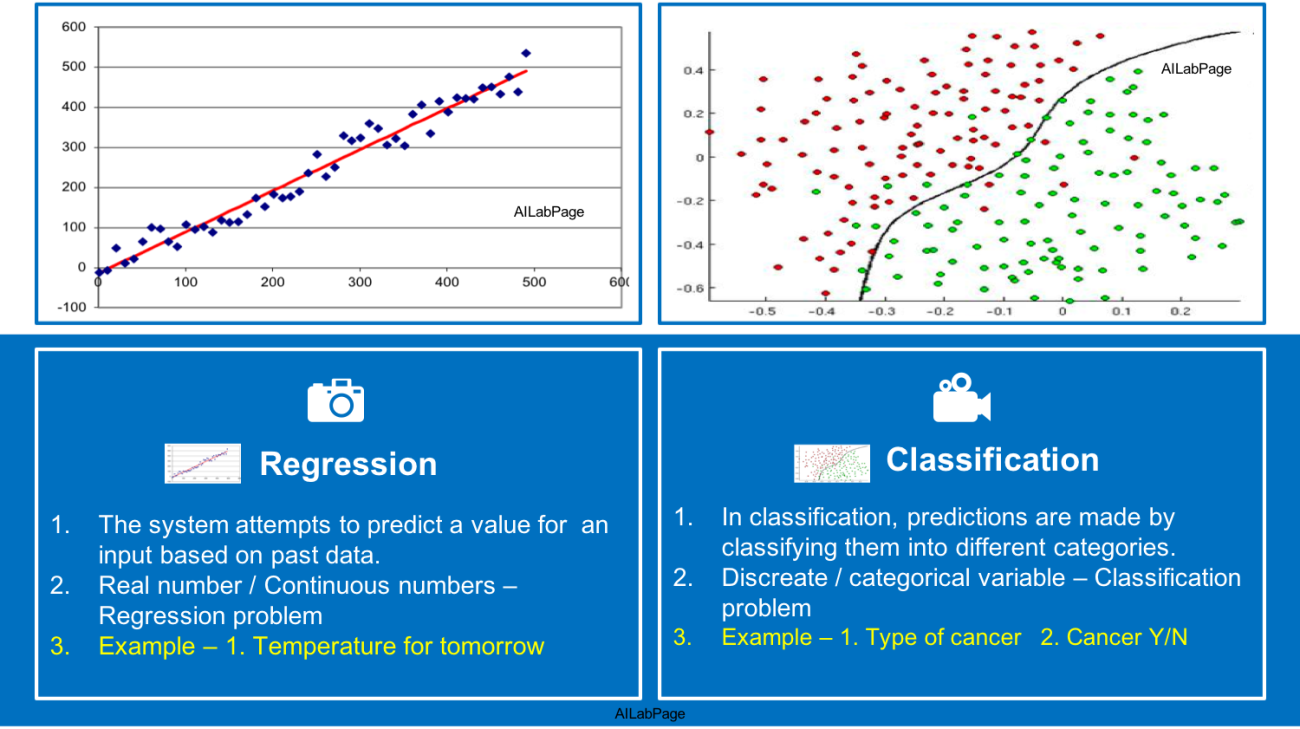

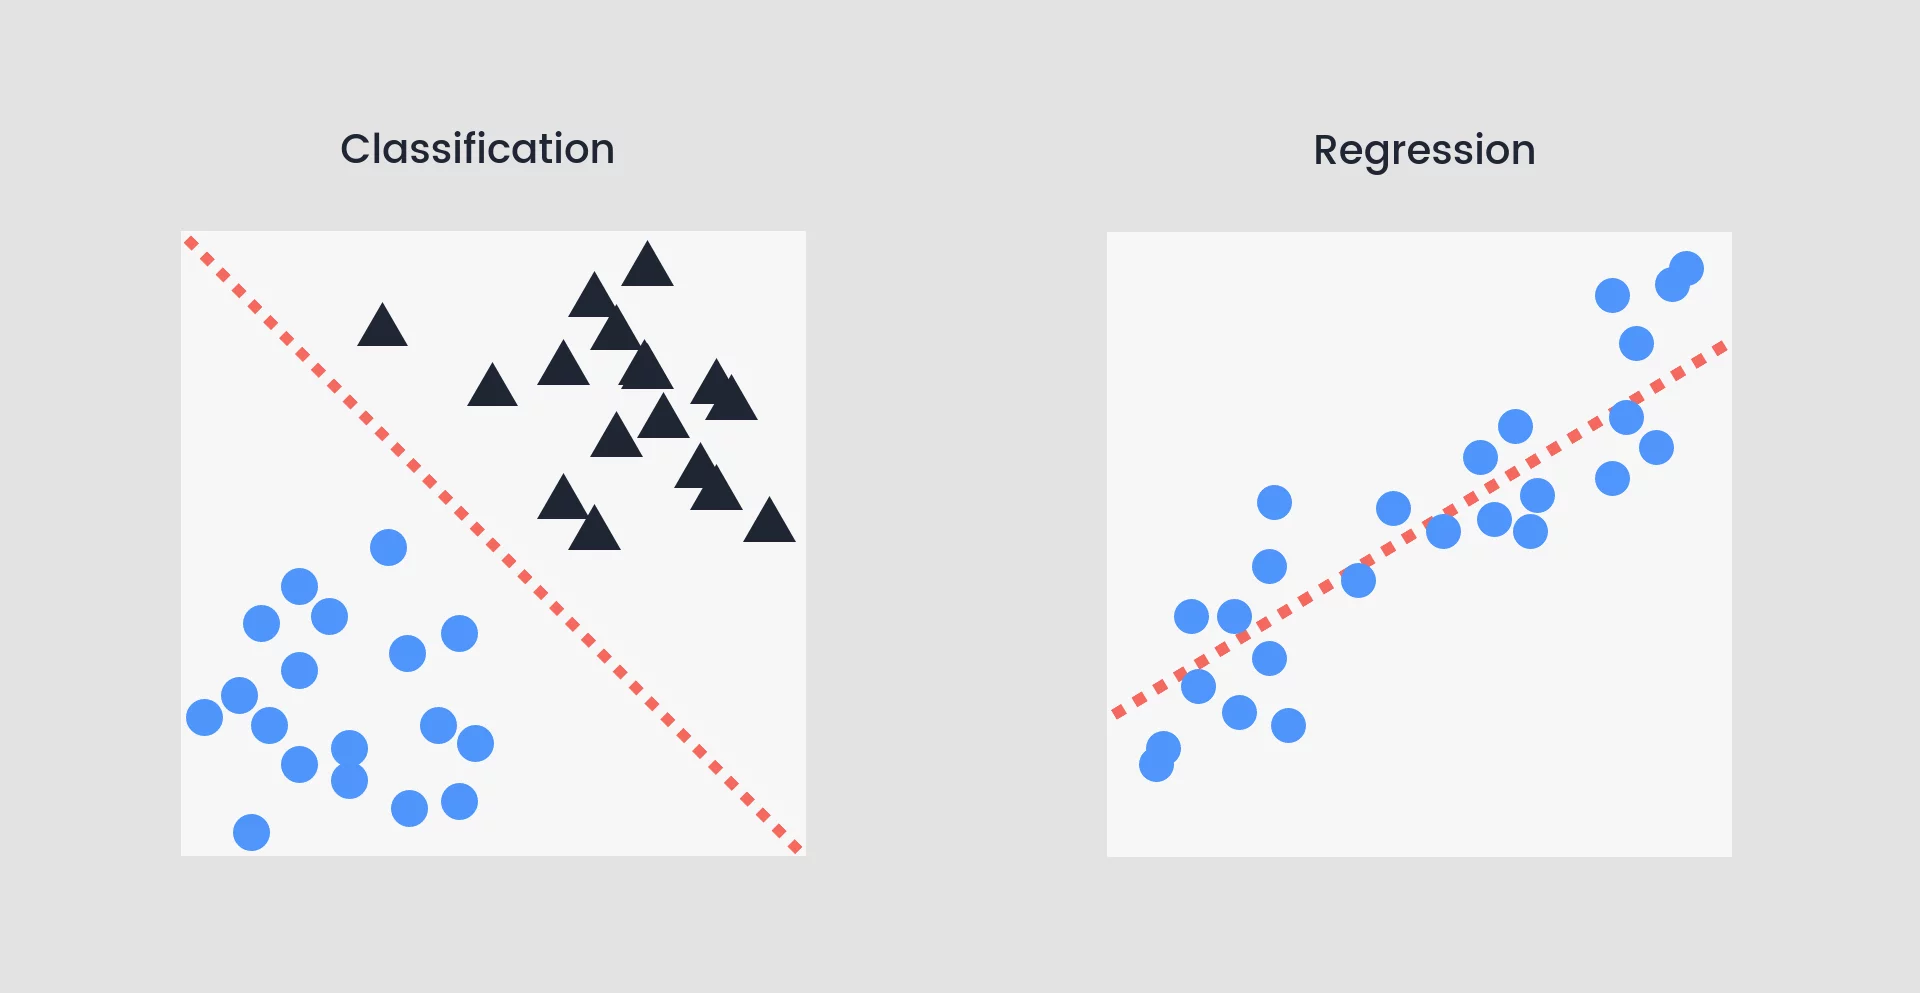

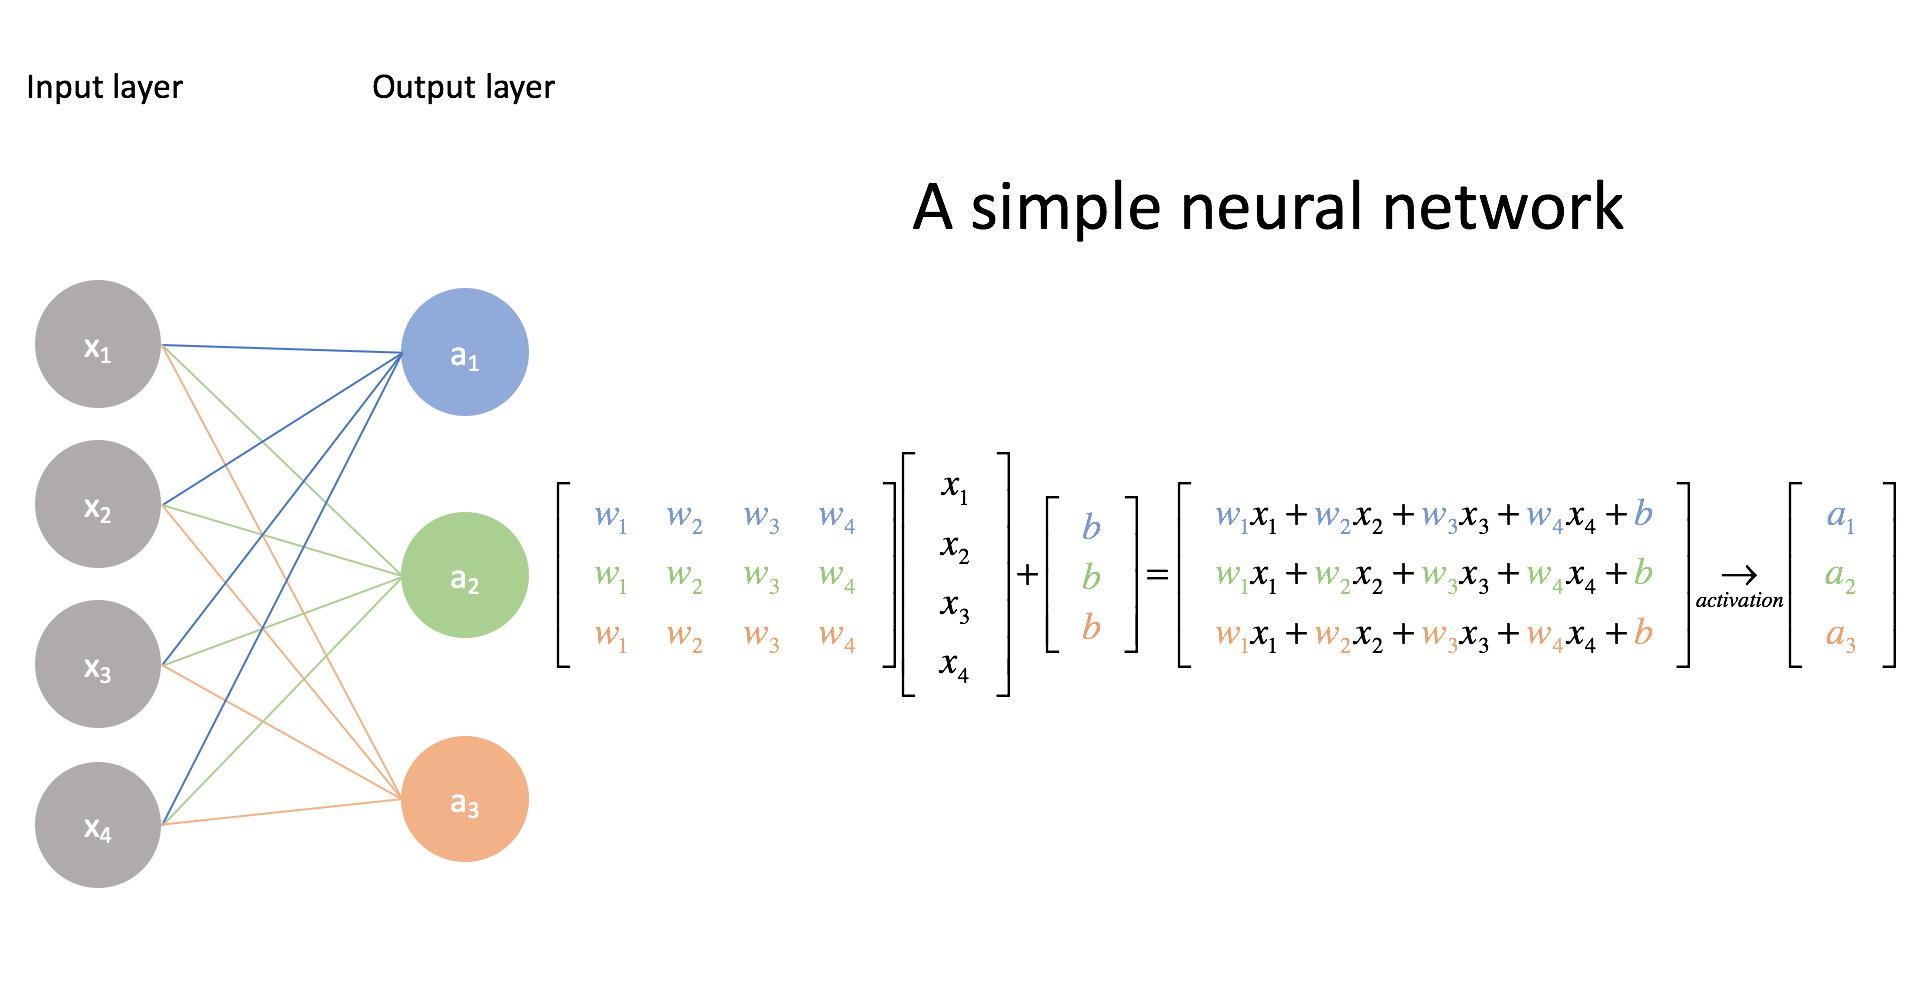

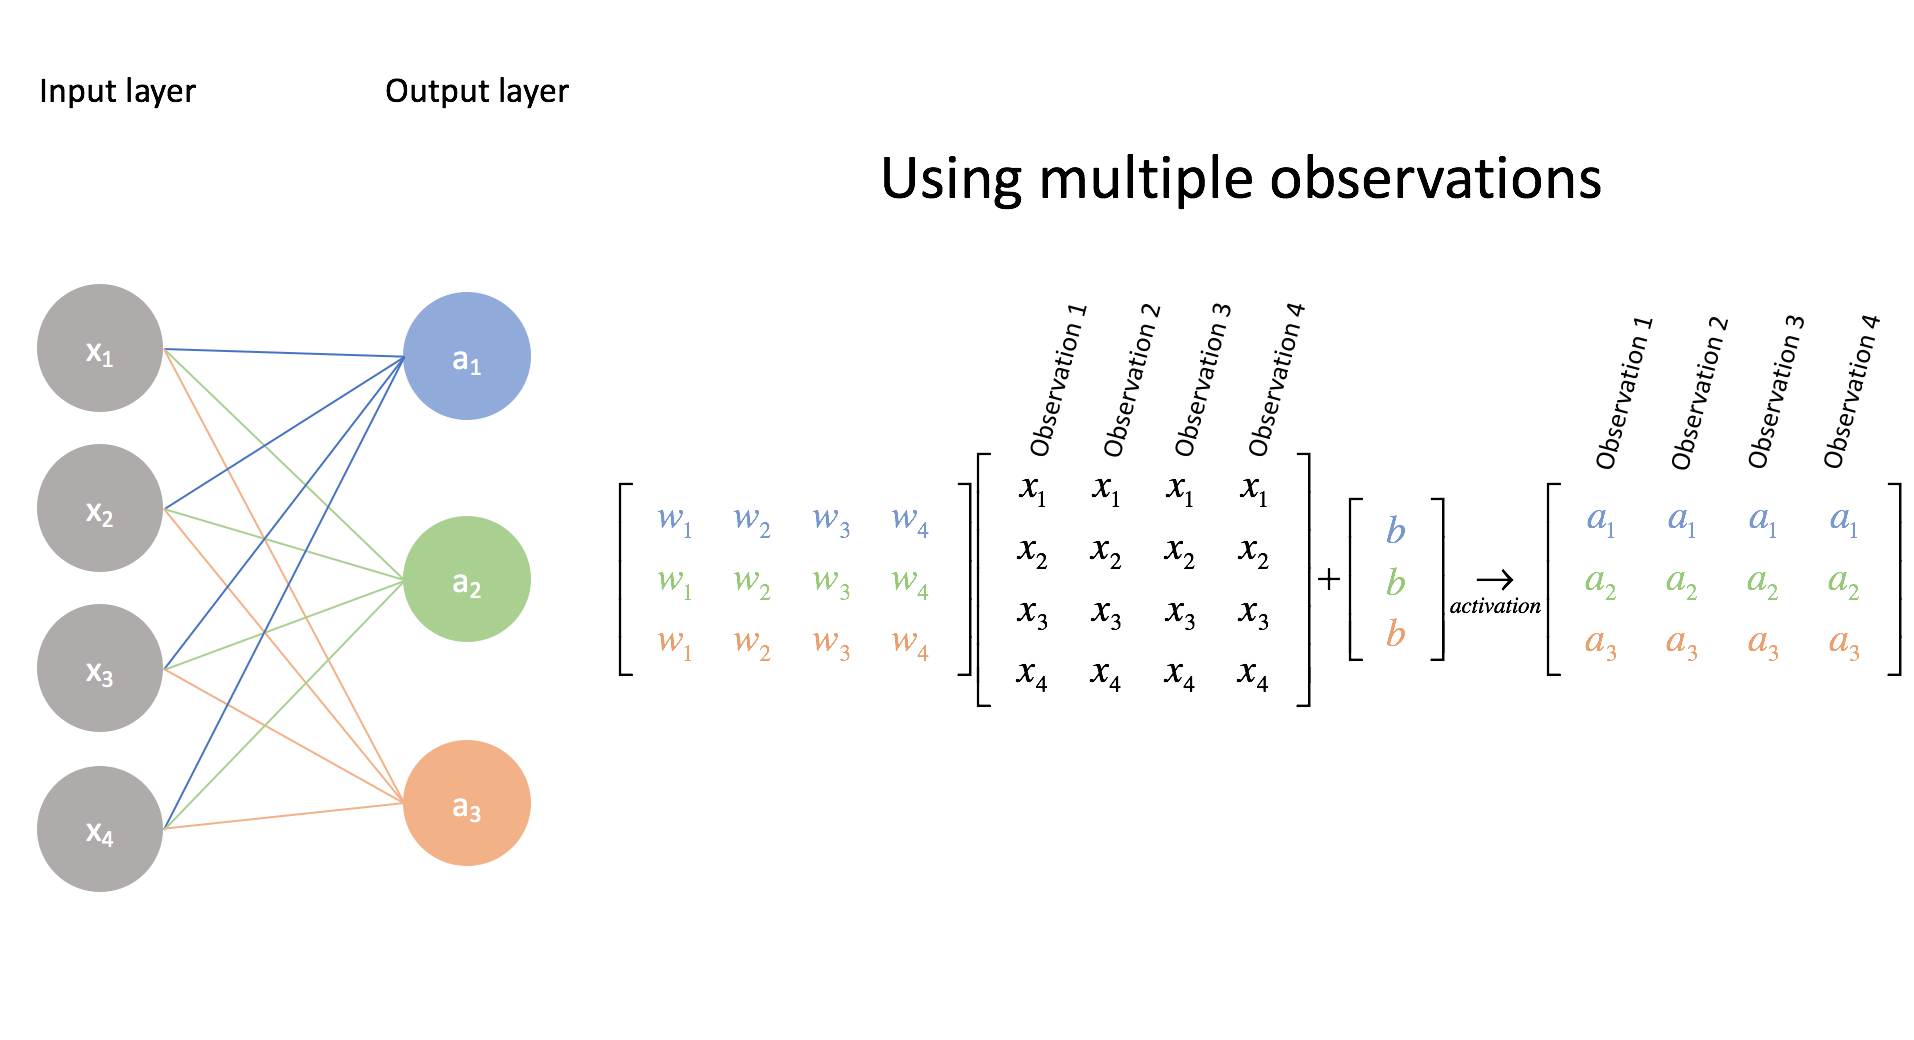

In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr # importing programs 
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-6w8tw8zn
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-6w8tw8zn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# $y=mx+b$

In [ ]:
def plot(x): # defines plot code
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
def montage_plot(x): # defines montage plot code
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
def one_hot(y): # define one_hot code
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
##MNIST # the different data sets 
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy() # defines the variables for all data
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape

(60000, 1, 28, 28)

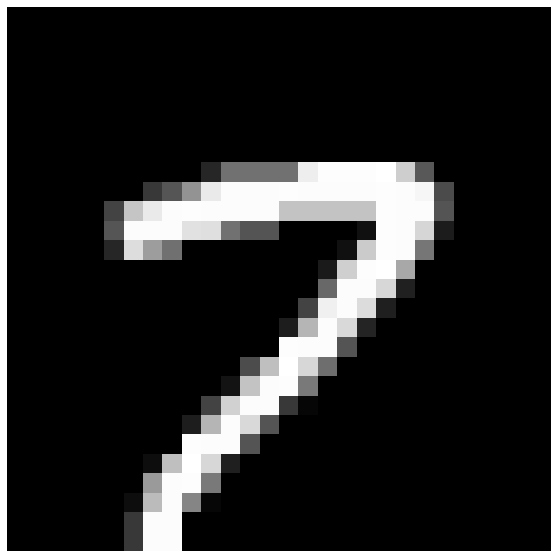

In [ ]:
plot(X[123,0,0:28,0:28]) # plot image

In [ ]:
Y[123]

7

In [ ]:
for i in range(3):
    plot(X[i,0,:,:])

In [ ]:
Y

array([5, 0, 4, ..., 5, 6, 8])

In [ ]:
X[0:25,0,:,:].shape

(25, 28, 28)

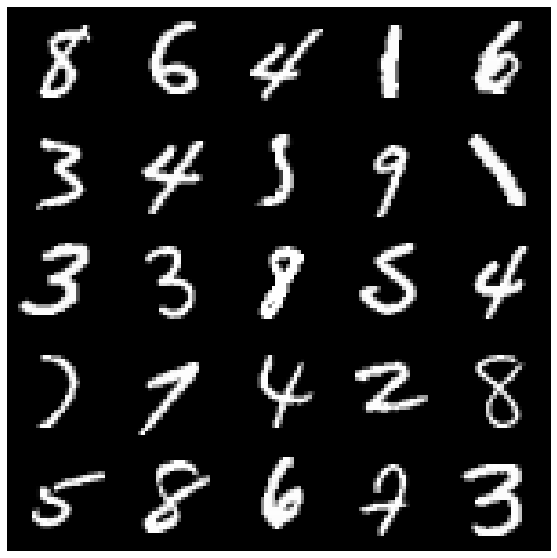

In [ ]:
montage_plot(X[125:150,0,:,:]) # shows the images of numbers from data set

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
28*28

784

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [ ]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

In [ ]:
X[0] # array of data for the first image

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

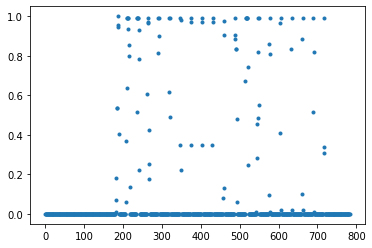

In [ ]:
plt.plot(X[100],'.') # Plots data

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

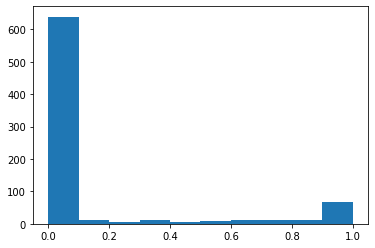

In [ ]:
plt.hist(X[0]) # histogram

In [ ]:
X = GPU_data(X) # defines the GPU variables
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  # raww data url
wget.download(url,"W.data")

'W (2).data'

In [ ]:
W = torch.load("W.data")

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def plot(x): # defines plot code
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()

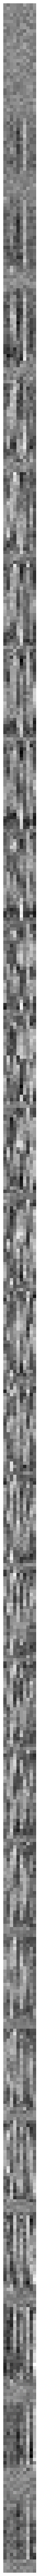

In [ ]:
plot(W[0:784,:10]) # shows all the data in the plot

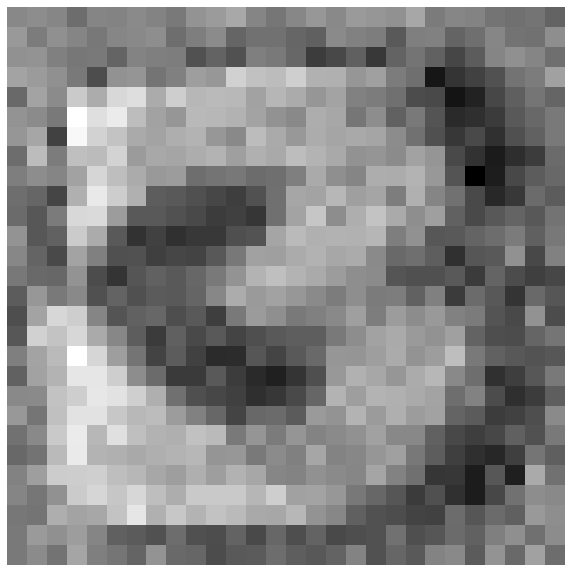

In [ ]:
plot(W[:,3].reshape(28,28)) # shows a three

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
b = 40 # getting batch code

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

torch.Size([40, 784])

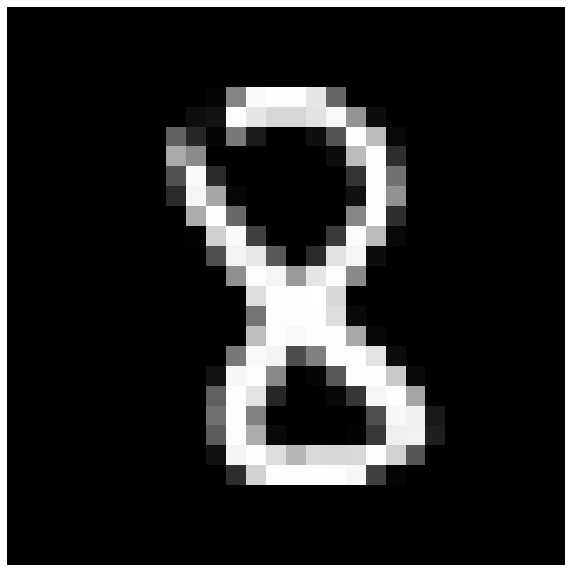

In [ ]:
plot(x[0].reshape(28,28)) # showing that this value is 8

In [ ]:
y

tensor([8., 6., 1., 4., 9., 4., 5., 7., 5., 7., 0., 4., 1., 0., 1., 5., 9., 8.,
        8., 4., 2., 0., 6., 9., 0., 9., 4., 7., 5., 8., 6., 3., 5., 6., 0., 0.,
        3., 7., 1., 0.], device='cuda:0')

In [ ]:
x.shape, W.shape

(torch.Size([40, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape

torch.Size([40, 10])

In [ ]:
(x@W).shape

torch.Size([40, 10])

In [ ]:
y = x@W

In [ ]:
y.shape

torch.Size([40, 10])

In [ ]:
y

In [ ]:
torch.argmax(y,1) # max of data

tensor([8, 2, 1, 4, 9, 4, 5, 7, 5, 7, 0, 4, 1, 0, 1, 5, 9, 8, 8, 4, 2, 8, 6, 9,
        0, 9, 4, 4, 5, 8, 6, 3, 5, 6, 0, 0, 3, 7, 1, 0], device='cuda:0')

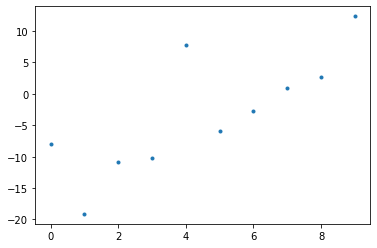

In [ ]:
plt.plot(y[0].cpu().detach().numpy().T,'.') # plots a graph

https://eleif.net/clicktimer.html

In [ ]:
x@W

tensor([[  1.6977, -12.0102,  19.2495,  ..., -17.8701,  -3.8401, -13.6639],
        [ -0.1199,   3.1272,   3.1434,  ...,  -5.2075,   8.2266,  -2.4144],
        [  1.1459, -13.6265,   2.1151,  ...,  -4.2139,  -7.1587,  -2.4139],
        ...,
        [  0.1224,  -3.6044,   0.3805,  ...,  -6.9121,   8.7947,   0.1556],
        [ -4.2082,  10.9038,   4.0385,  ...,  -4.9568,   3.7615,  -1.7323],
        [ -0.1119,  -7.5030,  -7.1552,  ...,   0.7004,   0.3247,  -3.8695]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
y2 = x@W 

In [ ]:
y2.shape

torch.Size([400, 10])

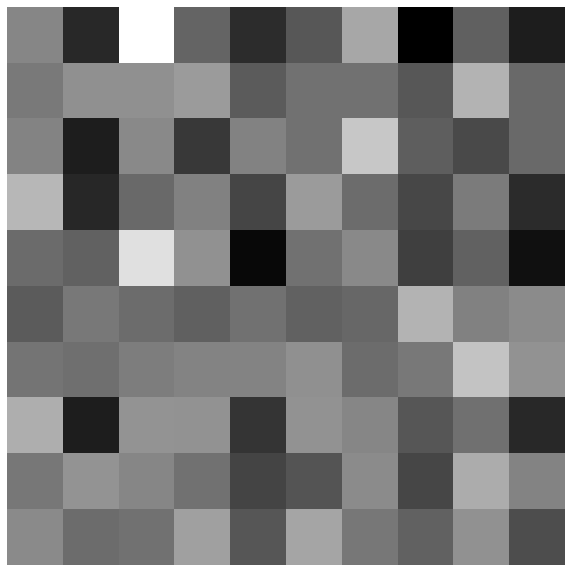

In [ ]:
plot(y2[0:10,:])

In [ ]:
y

tensor([[  1.6977, -12.0102,  19.2495,  ..., -17.8701,  -3.8401, -13.6639],
        [ -0.1199,   3.1272,   3.1434,  ...,  -5.2075,   8.2266,  -2.4144],
        [  1.1459, -13.6265,   2.1151,  ...,  -4.2139,  -7.1587,  -2.4139],
        ...,
        [  0.1224,  -3.6044,   0.3805,  ...,  -6.9121,   8.7947,   0.1556],
        [ -4.2082,  10.9038,   4.0385,  ...,  -4.9568,   3.7615,  -1.7323],
        [ -0.1119,  -7.5030,  -7.1552,  ...,   0.7004,   0.3247,  -3.8695]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
one_hot(y)

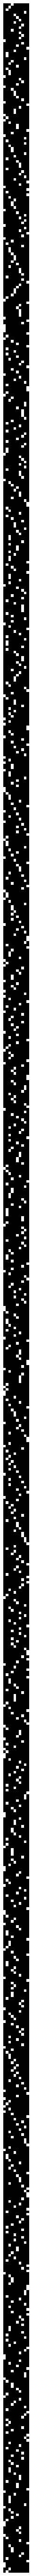

In [ ]:
plot(one_hot(y))

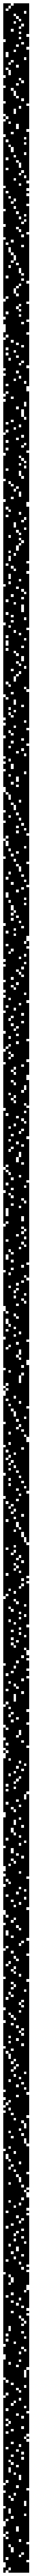

In [ ]:
plot(one_hot(torch.argmax(y2,1)))

In [ ]:
y # tensor values

tensor([3., 2., 1., 8., 4., 5., 6., 4., 7., 6., 3., 6., 7., 6., 0., 7., 5., 9.,
        4., 1., 1., 8., 3., 2., 5., 1., 2., 2., 0., 6., 7., 5., 0., 3., 4., 4.,
        5., 7., 0., 9., 6., 4., 4., 0., 1., 0., 2., 5., 5., 9., 3., 0., 8., 1.,
        8., 2., 3., 3., 8., 4., 1., 5., 6., 6., 1., 7., 6., 8., 4., 9., 6., 0.,
        9., 1., 9., 2., 4., 3., 3., 4., 0., 5., 8., 6., 8., 7., 0., 8., 6., 9.,
        7., 0., 3., 1., 7., 2., 2., 3., 4., 4., 3., 5., 2., 6., 6., 7., 1., 7.,
        9., 6., 5., 4., 4., 3., 1., 0., 9., 6., 5., 6., 6., 6., 0., 9., 7., 0.,
        0., 0., 9., 1., 0., 3., 5., 9., 1., 4., 1., 5., 2., 7., 6., 9., 3., 5.,
        0., 6., 4., 8., 1., 9., 9., 1., 0., 3., 2., 8., 8., 5., 7., 7., 7., 8.,
        3., 1., 6., 4., 1., 8., 7., 5., 1., 8., 7., 1., 1., 0., 6., 7., 8., 6.,
        8., 1., 6., 6., 7., 0., 2., 3., 5., 4., 6., 6., 3., 8., 9., 9., 1., 2.,
        6., 1., 3., 7., 4., 4., 8., 5., 6., 2., 2., 7., 2., 5., 5., 2., 4., 2.,
        2., 9., 1., 3., 4., 9., 2., 2., 

In [ ]:
torch.argmax(y2,1) # max of the data

tensor([3, 2, 1, 8, 4, 5, 6, 4, 7, 6, 3, 6, 9, 6, 0, 7, 5, 9, 4, 1, 1, 8, 3, 2,
        5, 1, 2, 2, 0, 6, 7, 5, 0, 3, 4, 4, 5, 7, 0, 9, 6, 4, 4, 0, 1, 0, 2, 5,
        5, 9, 3, 0, 8, 1, 8, 2, 3, 3, 8, 4, 1, 5, 6, 6, 1, 7, 6, 8, 4, 9, 6, 0,
        9, 1, 9, 2, 4, 3, 9, 4, 0, 5, 8, 6, 8, 7, 0, 5, 6, 9, 7, 0, 3, 1, 7, 2,
        2, 3, 4, 4, 3, 5, 2, 6, 6, 7, 1, 7, 9, 6, 5, 4, 4, 5, 1, 0, 9, 6, 5, 6,
        1, 6, 0, 9, 7, 0, 0, 0, 9, 1, 0, 3, 5, 7, 1, 4, 1, 5, 2, 7, 6, 9, 0, 5,
        0, 6, 4, 8, 1, 9, 9, 1, 0, 3, 0, 8, 8, 5, 7, 7, 7, 8, 3, 1, 6, 4, 1, 0,
        7, 5, 1, 8, 7, 1, 9, 0, 6, 7, 8, 6, 8, 1, 6, 6, 7, 0, 2, 3, 5, 4, 6, 6,
        3, 0, 9, 9, 1, 2, 6, 1, 8, 7, 4, 4, 8, 5, 6, 2, 6, 7, 6, 5, 5, 2, 4, 2,
        2, 9, 1, 3, 4, 9, 2, 2, 6, 2, 0, 5, 7, 8, 3, 7, 1, 4, 7, 7, 7, 1, 3, 8,
        3, 0, 2, 9, 4, 6, 1, 8, 1, 1, 7, 1, 4, 5, 7, 7, 5, 6, 8, 3, 6, 5, 4, 4,
        1, 2, 8, 9, 3, 0, 1, 4, 4, 7, 2, 4, 2, 3, 0, 8, 0, 4, 9, 2, 3, 0, 7, 3,
        9, 2, 7, 5, 8, 0, 2, 0, 3, 3, 0,

In [ ]:
b

1000

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.9330, device='cuda:0')

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
%%timeit # clock timer
X[20000]@W

53.8 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
torch.argmax(X@W,1)

tensor([5, 0, 4,  ..., 5, 6, 8], device='cuda:0')

In [ ]:
Y

tensor([5., 0., 4.,  ..., 5., 6., 8.], device='cuda:0')

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.9122, device='cuda:0')

In [ ]:
X@W

tensor([[  1.1735,  -5.3252,  -2.2280,  ...,   2.8160,  -2.5256,  -4.7146],
        [ 14.1848, -13.8266,  -2.0614,  ...,  -2.7536,  -0.4526,  -5.3169],
        [ -3.9527,  -9.5646,  -3.1270,  ...,  -0.5796,  -2.7272,   0.5264],
        ...,
        [  1.7139,  -3.4259, -10.8608,  ...,  -0.3874,   5.0143,   0.4739],
        [  3.0898, -10.5911,  -2.0102,  ...,  -4.0874,  -7.1931,  -2.6339],
        [  2.8741,  -6.6511,  -1.8780,  ...,  -3.2709,   7.5771,   1.3491]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
W[:,0].shape

torch.Size([784])

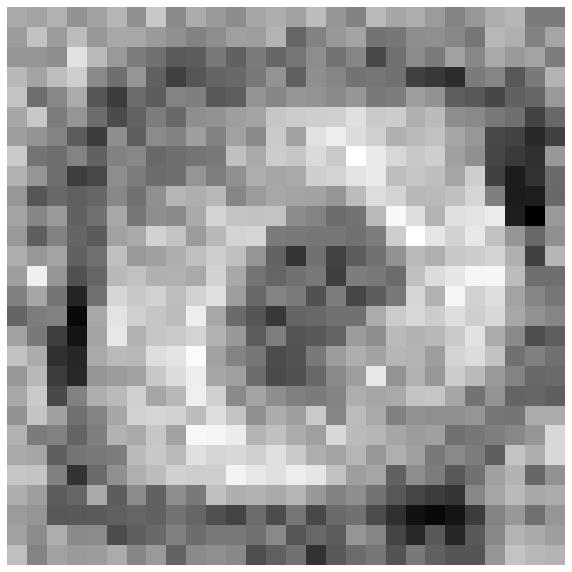

In [ ]:
plot(W[:,0].reshape(28,28))

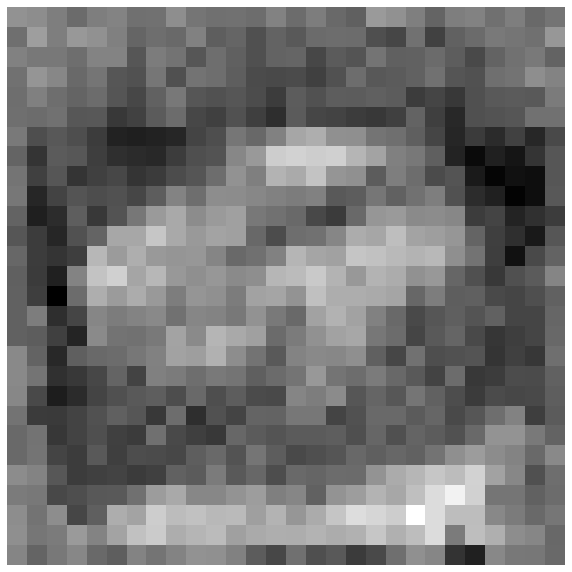

In [ ]:
plot(W[:,9].reshape(28,28))

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
(W.T).shape

torch.Size([10, 784])

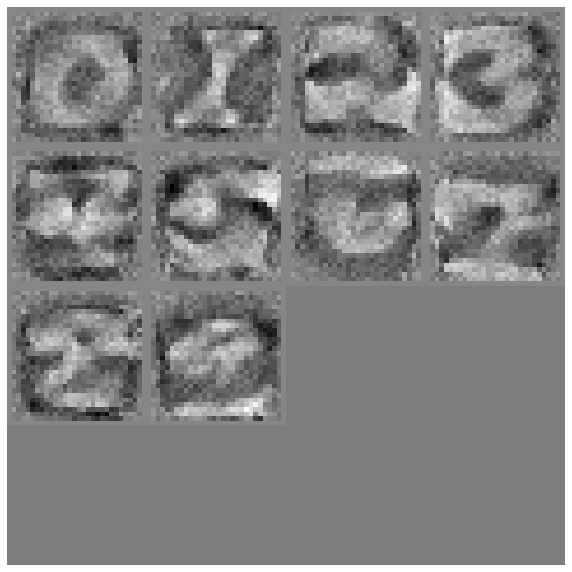

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy()) # shows numbers

In [ ]:
###################################################

In [ ]:
def softmax(x): # soft max code
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y): # accuracy code
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def get_batch(mode): # get batch code
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w): # defines model code

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [ ]:
wb.init(project="Simple_Linear_Adam_KMNIST"); # creates a run for train accuracy and loss
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 1000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    # if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

acc_test,▁▄▅▆▆▇▇▆▆▆▇▇▇█▇███████▇▇█▇█▇█▇▇▇▇█▇▇▇▇██
acc_train,▁▃▅▆▆▆▆▇▇▆▇▇▇▇█▇▇███▇███████████████████
loss,█▆▄▃▃▃▃▂▂▃▂▂▂▂▁▁▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁
acc_test,0.91797
acc_train,0.94434
loss,1.52069


/usr/local/lib/python3.7/dist-packages/mpcr/__init__.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


#Generator

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def GPU(data): # defines GPU data code
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x): # defines plot code
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
batch_size = 512

In [ ]:
# #MNIST # datasets
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy() # train set code
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [ ]:
###################################################

In [ ]:
def GPU(data): # GPU code
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X) # assigns the GPU code to different variables
X_test = GPU_data(X_test)

Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
X = (X + 1)/2
X_test = (X_test + 1)/2

In [ ]:
def get_batch(mode): # get batch code
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:,:,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:,:,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
x,y = get_batch('train')

(array([285585.,  13240.,  10157.,   9641.,  10369.,  10790.,  13708.,
         17899.,  19724.,  10295.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

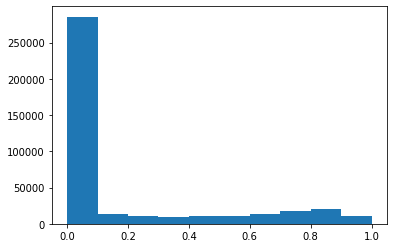

In [ ]:
plt.hist(x.flatten().cpu().numpy()) # histogram

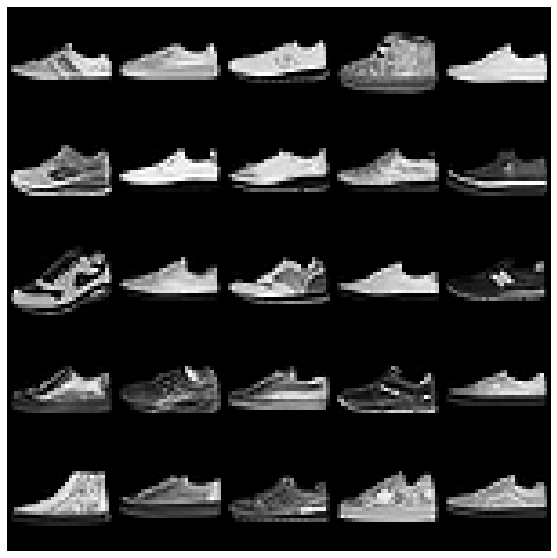

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy()) # different shoes from data set

In [ ]:
X = X.view(-1,784) # get batch coding
X_test = X_test.view(-1,784)

def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def MSE(image_batch_recon, image_batch):
    return torch.mean((image_batch_recon - image_batch)**2)

In [ ]:
def Encoder(x,w): # defines encoder code
    return x@w[0]

In [ ]:
def Decoder(x,w): # defines decoded code
    return x@(w[0].T)

In [ ]:
def Autoencoder(x,w): # define autoencoder code
    return Decoder(Encoder(x,w),w)

In [ ]:
batch_size = 512 # specifications
steps = 10000
learning_rate = 4e-3

In [ ]:
w0 = GPU(randn_trunc((784,78)))
w = [w0]

optimizer = torch.optim.Adam(params=w, lr=learning_rate, weight_decay=1e-5)

for step in range(steps):
        
    x,y = get_batch('train')
    
    # autoencoder reconstruction
    x2 = Autoencoder(x,w)
    
    # reconstruction error
    loss = MSE(x2, x)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    if step % 1000 == 0:
        print(loss.item())

0.4529896080493927
0.004655822645872831
0.0033787786960601807
0.0033901329152286053
0.0033731344155967236
0.003287359606474638
0.003432181430980563
0.0031015051063150167
0.003322013420984149
0.003368443576619029


In [ ]:
# batch_size = 16

In [ ]:
x,y = get_batch('test')

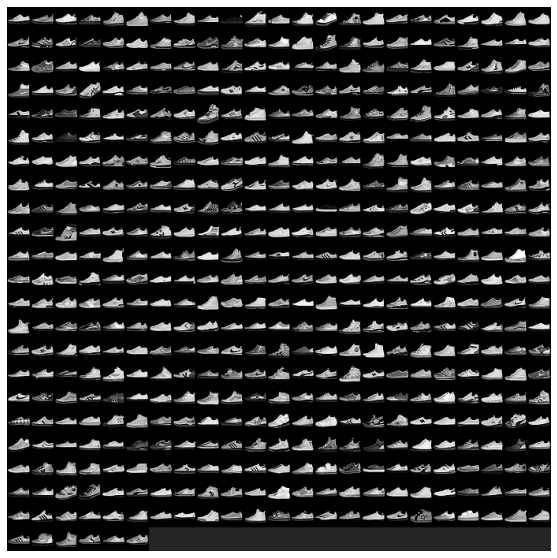

In [ ]:
montage_plot(x.reshape(-1,28,28).detach().cpu().numpy()) # shoe data set

In [ ]:
x2 = Autoencoder(x,w)

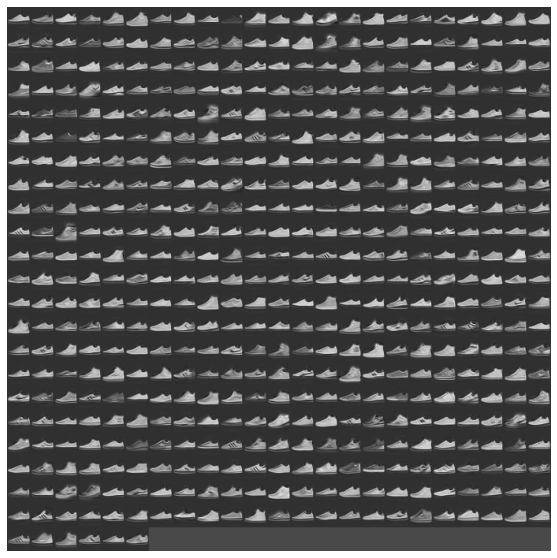

In [ ]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy()) # more shoes in the data set

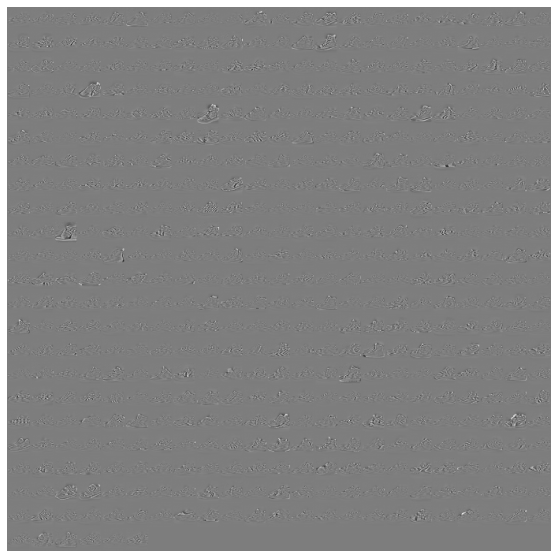

In [ ]:
montage_plot((x-x2).reshape(-1,28,28).detach().cpu().numpy()) # even more shoes

In [ ]:
w[0].shape # gets shape of data

torch.Size([784, 78])

In [ ]:
wp = w[0].T 

In [ ]:
wp = wp.reshape(-1,28,28)

In [ ]:
wp.shape

torch.Size([78, 28, 28])

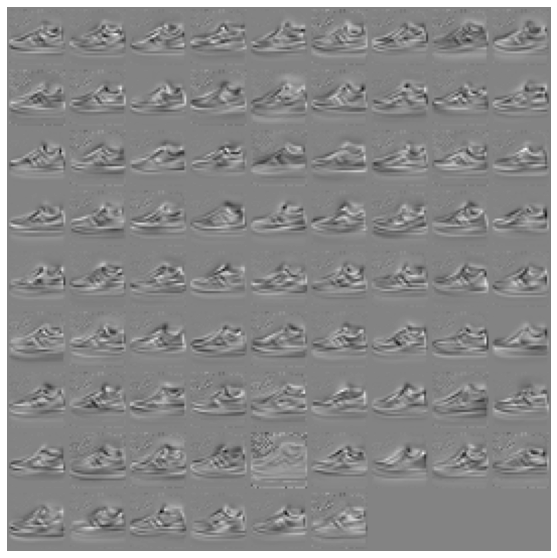

In [ ]:
montage_plot(wp.detach().cpu().numpy()) # shoe from data set

In [ ]:
x.shape

torch.Size([512, 784])

In [ ]:
x = x[0:1]

In [ ]:
y = Encoder(x,w)

In [ ]:
y.shape

torch.Size([1, 78])

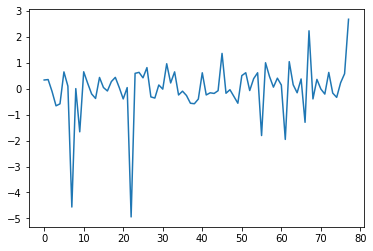

In [ ]:
plt.plot(y[0].cpu().detach().numpy()) # plots a graph 

In [ ]:
noise = 0.2*np.random.randn(78)

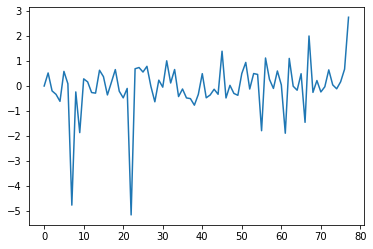

In [ ]:
plt.plot(y[0].cpu().detach().numpy() + noise) # plots graph with noise

In [ ]:
noise # array os noise values

array([-0.3336335 ,  0.17291472, -0.08492959,  0.32747778, -0.02754744,
       -0.05963911, -0.00690858, -0.20997028, -0.23864274, -0.20357593,
       -0.3625431 , -0.04491681, -0.05813011,  0.09287641,  0.20022287,
        0.3311514 , -0.26776716, -0.12887356,  0.22228362, -0.25035992,
       -0.0781896 , -0.1378283 , -0.22134731,  0.10156683,  0.11339095,
        0.14332094, -0.02167119,  0.30273216, -0.26941385,  0.09299055,
       -0.02751282,  0.0496356 , -0.09820845,  0.01374627, -0.17964106,
       -0.02264121, -0.21317676,  0.05699098, -0.18643992,  0.06610312,
       -0.11622574, -0.22944493, -0.19865409,  0.05463815, -0.25345106,
        0.0363231 , -0.30118523,  0.06840592,  0.0030651 ,  0.18920019,
       -0.00071308,  0.33208094, -0.04707378,  0.11446914, -0.14806578,
        0.01623696,  0.12412417, -0.20522822, -0.15565885,  0.19908526,
       -0.09611887,  0.06435266,  0.06555602, -0.15652426, -0.01008854,
        0.11947948, -0.15779685, -0.22519355,  0.1404328 , -0.13

In [ ]:
noise = GPU(noise)

In [ ]:
x2 = Decoder(y+noise,w)

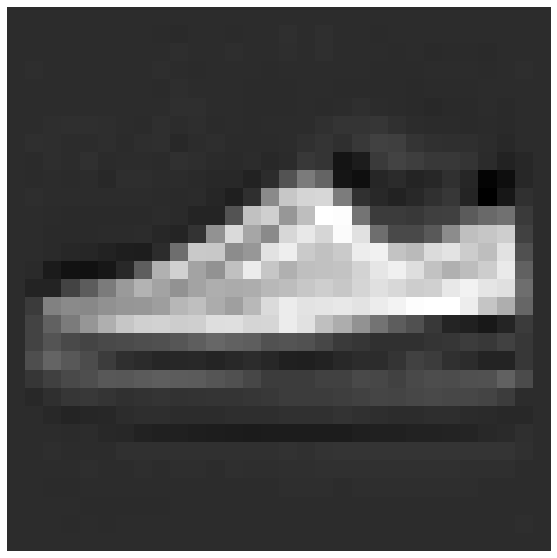

In [ ]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy()) # shows a shoe from the data set

In [ ]:
x2 = Decoder(y,w)

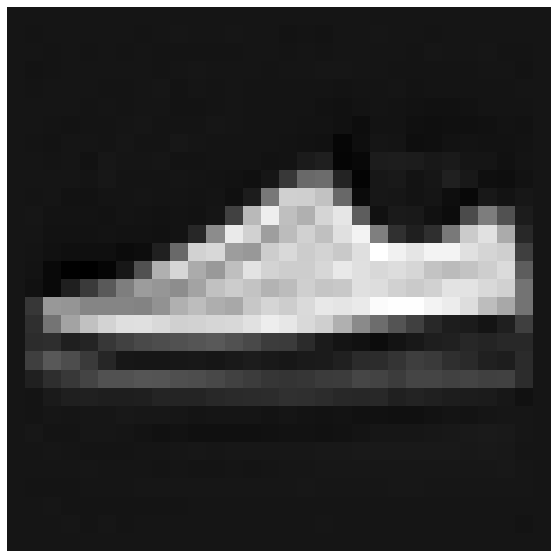

In [ ]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy()) # shoe from the date set